In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
# Let's pull the candidates info 

house_cand = pd.read_excel("house.xlsx")
print(house_cand.columns)

# senate_cand = pd.read_csv("senate.csv")

total_winners = house_cand[house_cand["GE WINNER INDICATOR"] == 1].count()[0]
house_cand.head()
# senate_cand.head()
# https://classic.fec.gov/finance/disclosure/metadata/DataDictionaryCandidateMaster.shtml

Index(['Cand_Name', 'FEC ID#', 'Cand_Incumbent_Challenger_Open_Seat',
       'Total_Receipt', 'Total_Disbursement', 'Cand_State',
       'Individual_Contribution', 'Other_Committee_Contribution',
       'Party_Committee_Contribution', 'STATE ABBREVIATION',
       ...
       'Cand_Office_Dist_45', 'Cand_Office_Dist_46', 'Cand_Office_Dist_47',
       'Cand_Office_Dist_48', 'Cand_Office_Dist_49', 'Cand_Office_Dist_50',
       'Cand_Office_Dist_51', 'Cand_Office_Dist_52', 'Cand_Office_Dist_53',
       'Cand_Office_Dist'],
      dtype='object', length=132)


,Cand_Name,FEC ID#,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,Cand_State,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,STATE ABBREVIATION,...,Cand_Office_Dist_45,Cand_Office_Dist_46,Cand_Office_Dist_47,Cand_Office_Dist_48,Cand_Office_Dist_49,Cand_Office_Dist_50,Cand_Office_Dist_51,Cand_Office_Dist_52,Cand_Office_Dist_53,Cand_Office_Dist
0,"STEARNS, CLIFFORD B",H8FL06056,INCUMBENT,806449.20,789781.22,FL,211884.83,372988.62,0.0,FL,...,0,0,0,0,0,0,0,0,0,6.0
1,"CUNHA, TIMOTHY M",H8FL06080,CHALLENGER,249756.94,249756.94,FL,101706.14,21350.00,0.0,FL,...,0,0,0,0,0,0,0,0,0,6.0
2,"ARMITAGE, FAYE",H8FL07047,CHALLENGER,35023.00,41688.00,FL,28523.00,0.00,0.0,FL,...,0,0,0,0,0,0,0,0,0,7.0
3,"ANDREWS, ROBERT E",H0NJ01066,INCUMBENT,1618561.39,3502682.61,NJ,757963.58,741527.16,1000.0,NJ,...,0,0,0,0,0,0,0,0,0,1.0
4,"PAYNE, DONALD M",H0NJ10026,INCUMBENT,804188.18,502616.83,NJ,302537.50,440473.84,17972.5,NJ,...,0,0,0,0,0,0,0,0,0,10.0


In [20]:
open_cand = house_cand[house_cand['Cand_Incumbent_Challenger_Open_Seat'] == "OPEN"]
winning_open = open_cand[open_cand["GE WINNER INDICATOR"] == 1] 
prob_open = winning_open.count()[0]/open_cand.count()[0]
winning_open.count()[0]

195

In [21]:
incumbents = house_cand[house_cand['Cand_Incumbent_Challenger_Open_Seat'] == "INCUMBENT"]
winning_incumbents = incumbents[incumbents["GE WINNER INDICATOR"] == 1] 
prob_incumbents = winning_incumbents.count()[0]/(total_winners - winning_open.count()[0])
winning_incumbents.count()[0]

1917

In [22]:
challengers = house_cand[house_cand['Cand_Incumbent_Challenger_Open_Seat'] == "CHALLENGER"]
winning_challengers = challengers[challengers["GE WINNER INDICATOR"] == 1] 
prob_challengers = winning_challengers.count()[0]/(total_winners - winning_open.count()[0])
winning_challengers.count()[0]

169

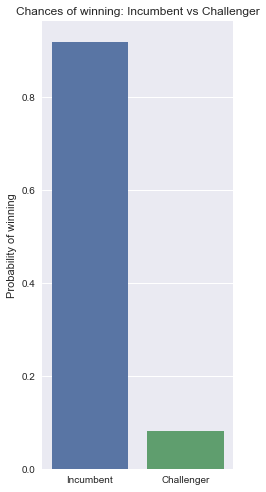

In [23]:
sns.set()
plot = pd.DataFrame({"Candidate Status":["Incumbent","Challenger"],"Probability of winning":[prob_incumbents,prob_challengers]})
g = sns.factorplot(x="Candidate Status", y="Probability of winning",data=plot, kind='bar',size=7, aspect=0.5)
for ax in g.axes.flatten():
    ax.set_xlabel("")
    ax.set_title('Chances of winning: Incumbent vs Challenger')
    g.savefig("incumbent.jpg",dpi=400)


In [24]:
print(prob_incumbents,prob_challengers)

0.9189837008628955 0.08101629913710451
